In [5]:
"""Illustration of good import statement styling."""

# standard library imports
import sys

# Third party imports

# Local application imports
sys.path.append('../code')

In [3]:
"""Illustration of imported modules autoreload."""
%load_ext autoreload
%autoreload 2

In [11]:
"""directory hash computation"""
from checksumdir import dirhash

directory  = 'D:/datasets/sounds/SANDBOX'
md5hash    = dirhash(directory, 'md5')

print(directory, md5hash)

directory  = 'D:/datasets/sounds/SANDBIX'
md5hash    = dirhash(directory, 'md5')

print(directory, md5hash)

sha1hash   = dirhash(directory, 'sha1', excluded_files=['package.json'])
sha256hash = dirhash(directory, 'sha256', excluded_extensions=['pyc'])

D:/datasets/sounds/SANDBOX 599583f76a934245d69e34982f518784
D:/datasets/sounds/SANDBIX 599583f76a934245d69e34982f518784


In [7]:
"""Ascii Progress bar example."""
import time
from tqdm import tqdm

for i in tqdm(range(100)):
    time.sleep(0.1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.74it/s]


In [5]:
"""Widget Progress bar example."""
import time
from tqdm.auto import tqdm

for i in tqdm(range(100)):
    time.sleep(0.1)

In [7]:
"""Nested Widget progres bar example"""

import time
import sys
from tqdm.auto import trange


def do_something():
    time.sleep(0.5)

def do_another_something():
    time.sleep(0.05)


for i in trange(5, file=sys.stdout, desc='file'):
    do_something()
    
    for j in trange(10, file=sys.stdout, leave=False, unit_scale=True, desc='chunk'):
        do_another_something()

In [3]:
"""Multiprocessing example"""

import multiprocessing

print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  8


Coefficients
b = [0.01020948 0.04083792 0.06125688 0.04083792 0.01020948]
a = [ 1.         -1.96842779  1.73586071 -0.72447083  0.1203896 ]


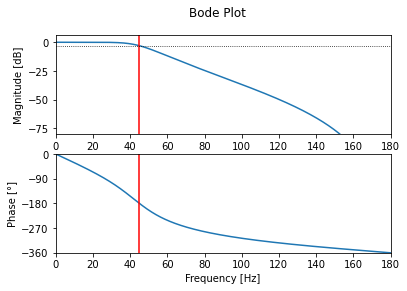

In [1]:
"""Filter"""
from scipy.signal import butter, freqz
import matplotlib.pyplot as plt
from math import pi
import numpy as np

f_s = 360    # Sample frequency in Hz
f_c = 45     # Cut-off frequency in Hz
order = 4    # Order of the butterworth filter

omega_c = 2 * pi * f_c       # Cut-off angular frequency
omega_c_d = omega_c / f_s    # Normalized cut-off frequency (digital)

# Design the digital Butterworth filter
b, a = butter(order, omega_c_d / pi)    
print('Coefficients')
print("b =", b)                           # Print the coefficients
print("a =", a)

w, H = freqz(b, a, 4096)                  # Calculate the frequency response
w *= f_s / (2 * pi)                       # Convert from rad/sample to Hz

# Plot the amplitude response
plt.subplot(2, 1, 1)            
plt.suptitle('Bode Plot')
H_dB = 20 * np.log10(abs(H))              # Convert modulus of H to dB
plt.plot(w, H_dB)
plt.ylabel('Magnitude [dB]')
plt.xlim(0, f_s / 2)
plt.ylim(-80, 6)
plt.axvline(f_c, color='red')
plt.axhline(-3, linewidth=0.8, color='black', linestyle=':')

# Plot the phase response
plt.subplot(2, 1, 2)
phi = np.angle(H)                         # Argument of H
phi = np.unwrap(phi)                      # Remove discontinuities 
phi *= 180 / pi                           # and convert to degrees
plt.plot(w, phi)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [°]')
plt.xlim(0, f_s / 2)
plt.ylim(-360, 0)
plt.yticks([-360, -270, -180, -90, 0])
plt.axvline(f_c, color='red')

plt.show()

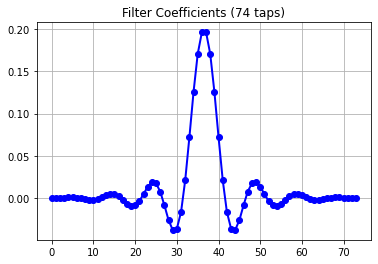

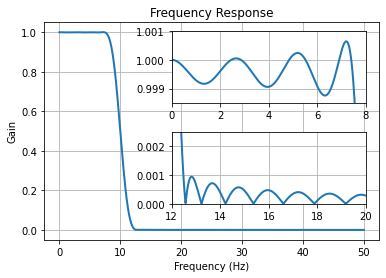

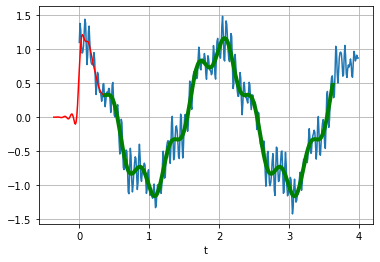

In [8]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()

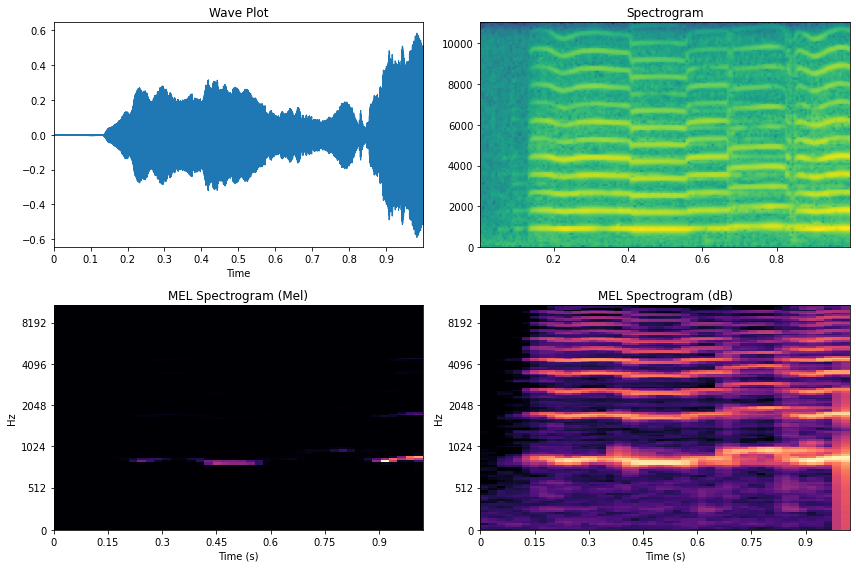

In [22]:
"""Mel Coefficients"""
#============================================== IMPORTS =============================================
#===== Standard imports
import os
#import warnings                   # This block prevents display of harmless warnings, but should be
#warnings.filterwarnings("ignore") # commented out till the final version, to avoid missing "real" warnings 

#===== 3rd party imports
import matplotlib.pyplot as plt
import librosa
import librosa.display

#===== Repository imports
# None

#============================================ PARAMETERS ============================================
OFFSET       = 0
DURATION     = 1                      # Chunk duration in seconds
SAMPLE_RATE  = 22050

# Audio file full path 
FILE_PATH ="samples/violin.wav"

data, sr = librosa.load(FILE_PATH, offset = OFFSET, duration = DURATION, sr = SAMPLE_RATE)

ROWS = 2

plt.figure(figsize=(12, ROWS*4))

plt.subplot(ROWS, 2, 1)
plt.title('Wave Plot')
librosa.display.waveplot(data, sr = sr, max_sr = sr)

plt.subplot(ROWS, 2, 2)
plt.title('Spectrogram')
Pxx, freqs, bins, im = plt.specgram(data, NFFT=256, Fs = sr, noverlap=128)

plt.subplot(ROWS, 2, 3)           
plt.title('MEL Spectrogram (Mel)')
spec = librosa.feature.melspectrogram(y=data, sr=sr)
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sr)
#plt.colorbar()

plt.subplot(ROWS, 2, 4)
plt.title('MEL Spectrogram (dB)')
db_spec = librosa.power_to_db(spec, ref=np.max)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)

plt.tight_layout()
plt.show()
#plt.colorbar()

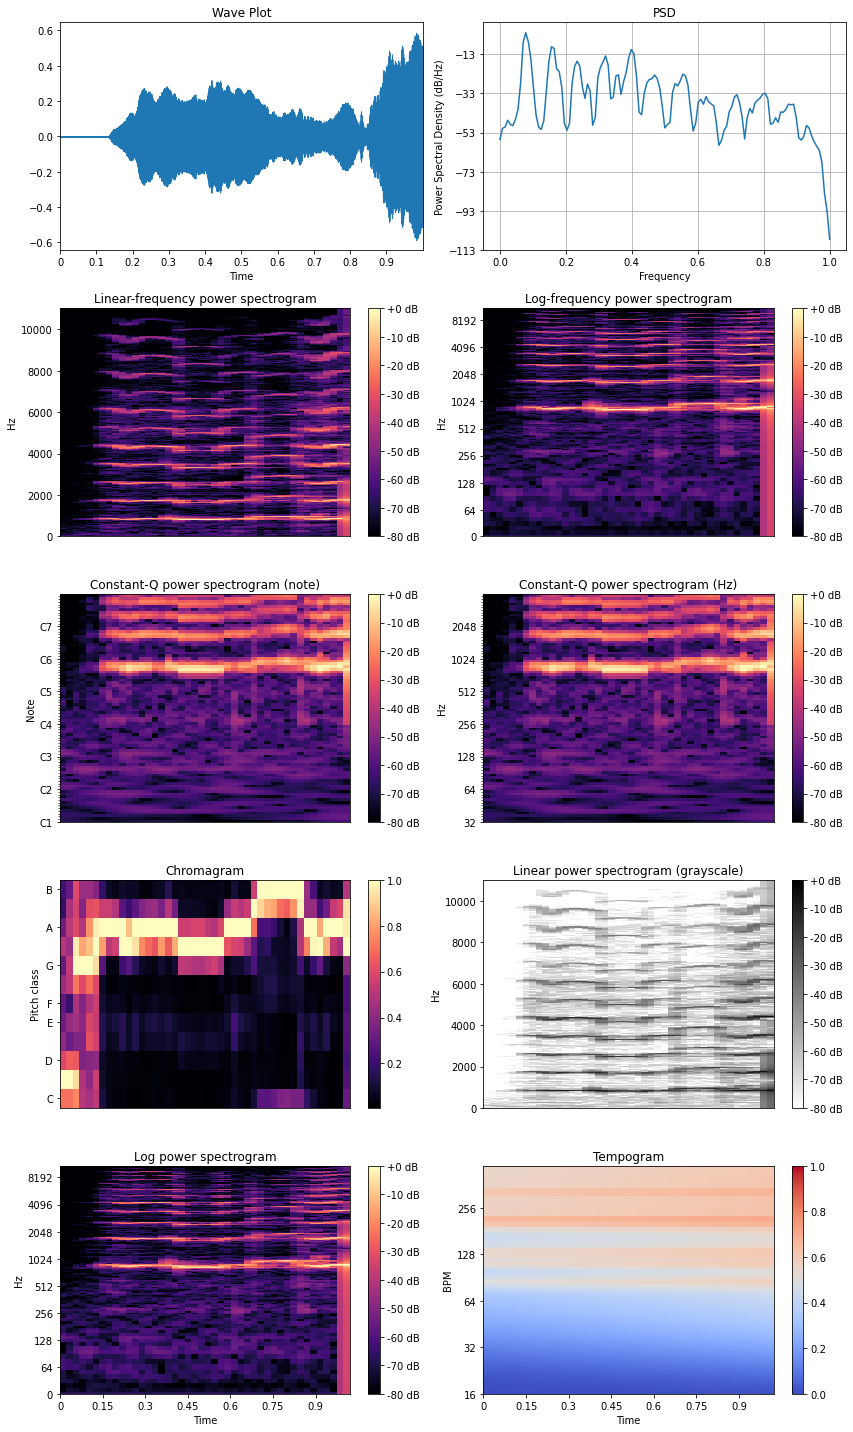

In [23]:
"""Mel Coefficients"""
#============================================== IMPORTS =============================================
#===== Standard imports
import os
#import warnings                   # This block prevents display of harmless warnings, but should be
#warnings.filterwarnings("ignore") # commented out till the final version, to avoid missing "real" warnings 

#===== 3rd party imports
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

#===== Repository imports
# None

#============================================ PARAMETERS ============================================
OFFSET       = 0
DURATION     = 1                      # Chunk duration in seconds
SAMPLE_RATE  = 22050

# Audio file full path 
FILE_PATH ="samples/violin.wav"


y, sr = librosa.load(FILE_PATH, offset = OFFSET, duration = DURATION, sr = SAMPLE_RATE)


ROWS = 5
plt.figure(figsize=(12, 4*ROWS))



# Visualize signal
plt.subplot(ROWS, 2, 1)
librosa.display.waveplot(y, sr = sr, max_sr = sr)
plt.title('Wave Plot')

# Visualize Power Spectrum Density
plt.subplot(ROWS, 2, 2)
plt.psd(y)
plt.title('PSD')


# Visualize an STFT power spectrum
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(ROWS, 2, 3)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Or on a logarithmic scale
plt.subplot(ROWS, 2, 4)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

# Or use a CQT scale (note)
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
plt.subplot(ROWS, 2, 5)
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

# # Or use a CQT scale (Hz)
plt.subplot(ROWS, 2, 6)
librosa.display.specshow(CQT, y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')

# Draw a chromagram with pitch classes
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.subplot(ROWS, 2, 7)
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

# Force a grayscale colormap (white -> black)
plt.subplot(ROWS, 2, 8)
librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear power spectrogram (grayscale)')

# Draw time markers automatically

plt.subplot(ROWS, 2, 9)
librosa.display.specshow(D, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log power spectrogram')

# Draw a tempogram with BPM markers

plt.subplot(ROWS, 2, 10)
Tgram = librosa.feature.tempogram(y=y, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram')


plt.tight_layout()
plt.show()



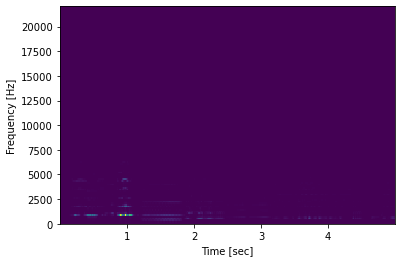

In [15]:
"""Spectrogram using sciypi.signal"""

import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('samples/violin.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

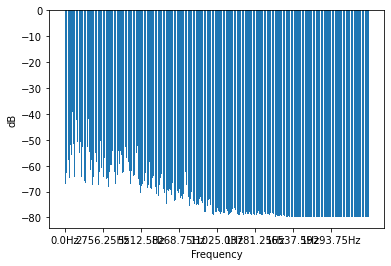

In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


file = 'samples/violin.wav'
# load the file
y, sr = librosa.load(file, sr=44100)
# short time fourier transform
# (n_fft and hop length determine frequency/time resolution)
n_fft = 2048
S = librosa.stft(y, n_fft=n_fft, hop_length=n_fft//2)
# convert to db
# (for your CNN you might want to skip this and rather ensure zero mean and unit variance)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
# average over file
D_AVG = np.mean(D, axis=1)

plt.bar(np.arange(D_AVG.shape[0]), D_AVG)
x_ticks_positions = [n for n in range(0, n_fft // 2, n_fft // 16)]
x_ticks_labels = [str(sr / 2048 * n) + 'Hz' for n in x_ticks_positions]
plt.xticks(x_ticks_positions, x_ticks_labels)
plt.xlabel('Frequency')
plt.ylabel('dB')
plt.show()